In [65]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

import pandas as pd
import nbimporter
import power_analysis
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit

np.random.seed(1)

In [22]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

In [23]:
#Import Data
file_path = '/Users/yzamora/power/STREAM_big.results'
df = pd.read_csv(file_path, sep='\s+')
print (df.head())

  cores    freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY
0  0xe6  100000  5.887958  5.439624  461.927430         NaN        NaN
1  0xe6  200000  5.888939  5.474008  464.770101         NaN        NaN
2  0xe6  400000  5.897709  5.441137  461.291977         NaN        NaN
3  0xe6  600000  5.897312  5.442045  461.399975         NaN        NaN
4  0xe6  700000  5.908167  5.432657  459.758156         NaN        NaN


In [24]:
df = power_analysis.create_col(df)

    cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0    0xe6   100000  5.887958  5.439624  461.927430         NaN        NaN   
1    0xe6   200000  5.888939  5.474008  464.770101         NaN        NaN   
2    0xe6   400000  5.897709  5.441137  461.291977         NaN        NaN   
3    0xe6   600000  5.897312  5.442045  461.399975         NaN        NaN   
4    0xe6   700000  5.908167  5.432657  459.758156         NaN        NaN   
5    0xe6   800000  5.893648  5.440728  461.575041         NaN        NaN   
6    0xe6  1000000  5.892087  5.463399  463.621307         NaN        NaN   
7    0xe6  1200000  5.879515  5.468053  465.008695         NaN        NaN   
8    0xe6  1400000  5.890988  5.457655  463.220651         NaN        NaN   
9    0xaa   100000  5.994764  4.567958  380.995561         NaN        NaN   
10   0xaa   200000  6.142090  4.639552  377.685050         NaN        NaN   
11   0xaa   400000  6.132738  4.633690  377.782892         NaN        NaN   

In [25]:
df = df.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY','big_cores','lil_cores','total_cores'])


In [89]:
print(df.head())
X = df[['freq','core-0','core-1','core-2','core-3','core-4','core-5','core-6','core-7']]
y = df['Power']

print ("X size:", X.shape)
print ("y size", y.shape)

X = X.values
y = y.values

     freq      Rate     Power      Energy  core-0  core-1  core-2  core-3  \
0  100000  5.887958  5.439624  461.927430       1       1       1       0   
1  200000  5.888939  5.474008  464.770101       1       1       1       0   
2  400000  5.897709  5.441137  461.291977       1       1       1       0   
3  600000  5.897312  5.442045  461.399975       1       1       1       0   
4  700000  5.908167  5.432657  459.758156       1       1       1       0   

   core-4  core-5  core-6  core-7  
0       0       1       1       0  
1       0       1       1       0  
2       0       1       1       0  
3       0       1       1       0  
4       0       1       1       0  
X size: (324, 9)
y size (324,)


In [90]:
#y = f(y_other).ravel()

In [91]:
# all_y_test = np.zeros((0,))
# all_y_pred = np.zeros((0,))
# #given options and list of data, returns the indices of training and test sets 
# for train_inds, test_inds in ShuffleSplit(n_splits=5, test_size=0.1).split(X,y):
#     # Split off the train and test set
#     X_test, y_test = X.iloc[test_inds, :], y[test_inds]
#     X_train, y_train = X.iloc[train_inds, :], y[train_inds]
    
#     # Train the model
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     # Append the results
#     all_y_test = np.concatenate((all_y_test, y_test))
#     #print (all_y_test)
#     all_y_pred = np.concatenate((all_y_pred, y_pred))

In [92]:
#Mesh the input space for evaluations of the real function, the prediction and its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

In [93]:
#Instantiate a Gaussian Process Model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [94]:
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=10), n_restarts_optimizer=9,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [95]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(X, return_std=True)

[5.439624 5.474008 5.441137 5.442045 5.432657 5.440728 5.463399 5.468053
 5.457655 4.567958 4.639552 4.63369  4.623678 4.626373 4.633241 4.626859
 4.62793  4.625277 5.387178 5.434772 5.452016 5.460129 5.464754 5.475984
 5.458857 5.485718 5.465076 3.554354 3.516393 3.497162 3.504558 3.504021
 3.503279 3.503156 3.507025 3.505391 5.631357 5.722359 5.751586 5.755745
 5.767213 5.774072 5.776001 5.768005 5.760819 3.606425 3.566931 3.544256
 3.548901 3.532185 3.542985 3.535022 3.53615  3.533506 5.313466 5.393193
 5.407031 5.417774 5.419539 5.42636  5.412325 5.415992 5.414513 5.707672
 5.372265 4.453611 5.438244 5.686908 5.716493 5.72856  5.718141 5.739091
 4.60921  4.592627 4.570847 4.565692 4.5394   4.527089 4.530073 4.536751
 4.558246 4.643959 4.631189 4.624616 4.615869 4.625859 4.625192 4.624035
 4.625227 4.623493 3.525383 3.515857 3.520102 3.511202 3.506298 3.505297
 3.514647 3.505711 3.514588 3.517186 3.517468 3.512427 3.511876 3.507136
 3.516945 3.519063 3.513573 3.510238 3.485358 3.482

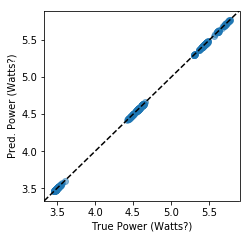

In [96]:
fig, ax = plt.subplots()

# Make the plot
ax.scatter(y, y_pred, alpha=0.5)
print (y)

# Make it pretty
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_xlim())

ax.set_xlabel('True Power (Watts?)')
ax.set_ylabel('Pred. Power (Watts?)')

fig.set_size_inches(3.5, 3.5)

# Add in the goal line
ax.plot(ax.get_xlim(), ax.get_ylim(), 'k--');